In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/samples.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


###Is selection more apparent when mutations happen early in tumorigenesis? <br>
#####Approach: Reduce mutation matrix to high allelic fraction mutations and re-run ORs

Get the mutations with their allelic fractions

In [3]:
df_indels = pd.read_csv('/cellar/users/ramarty/Data/hla/mutations/processed_indel_files.full_tcga.allelic_fraction.csv', index_col=0)

In [4]:
df_indels.head()

,Tumor_Sample_Barcode,Hugo_Symbol,Variant_Classification,Start_Position,t_depth,t_ref_count,t_alt_count,Barcode,combined,allelic_fraction
50,TCGA-S9-A7J1-01A-21D-A34J-08,FUBP1,Frame_Shift_Del,77962785,70,33,37,TCGA-S9-A7J1,FUBP1_fsd_77962785,0.528571
134,TCGA-HT-8105-01A-11D-2395-08,FUBP1,Frame_Shift_Del,77962785,37,8,29,TCGA-HT-8105,FUBP1_fsd_77962785,0.783784
1916,TCGA-HT-7880-01A-11D-2395-08,NF1,Frame_Shift_Del,31235639,239,215,24,TCGA-HT-7880,NF1_fsd_31235639,0.100418
17043,TCGA-DU-5847-01A-11D-1705-08,PTEN,Frame_Shift_Ins,87961046,70,17,53,TCGA-DU-5847,PTEN_fsi_87961046,0.757143
17157,TCGA-FG-6691-01A-11D-1893-08,ATRX,Frame_Shift_Ins,77684181,130,79,51,TCGA-FG-6691,ATRX_fsi_77684181,0.392308


In [5]:
df_missense = pd.read_csv('/cellar/users/ramarty/Data/hla/mutations/processed_mutation_files.full_tcga.allelic_fraction.csv',
                          index_col=0)
print len(df_missense)

10577


In [6]:
df_missense.head()

,Tumor_Sample_Barcode,Hugo_Symbol,Variant_Classification,Protein_position,Amino_acids,t_depth,t_ref_count,t_alt_count,Barcode,combined,allelic_fraction
398,TCGA-MB-A8JL-01A-11D-A36J-09,TP53,Missense_Mutation,281/393,D/E,48,26,22,TCGA-MB-A8JL,TP53_D281E,0.458333
399,TCGA-MB-A8JL-01A-11D-A36J-09,TP53,Missense_Mutation,272/393,V/M,42,24,18,TCGA-MB-A8JL,TP53_V272M,0.428571
560,TCGA-DX-A6B7-01A-11D-A307-09,TP53,Missense_Mutation,275/393,C/Y,24,3,20,TCGA-DX-A6B7,TP53_C275Y,0.833333
701,TCGA-QQ-A5VA-01A-12D-A32I-09,TP53,Missense_Mutation,220/393,Y/H,79,52,27,TCGA-QQ-A5VA,TP53_Y220H,0.341772
905,TCGA-QC-A6FX-01A-11D-A32I-09,TP53,Missense_Mutation,242/393,C/S,44,5,39,TCGA-QC-A6FX,TP53_C242S,0.886364


In [7]:
df_all = pd.concat([df_indels[['Barcode', 'combined', 'allelic_fraction']],
                    df_missense[['Barcode', 'combined', 'allelic_fraction']]])

In [8]:
df_all.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mutations/mutations_with_alleleic fraction.csv')

Get mutation names

In [9]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv',
                               index_col=0)

In [10]:
mutations = list(patient_mutations.columns)
samples_with_mutations = list(patient_mutations.index)

In [11]:
df_all_driver = df_all[df_all.combined.isin(mutations)]
print len(df_all_driver)

9887


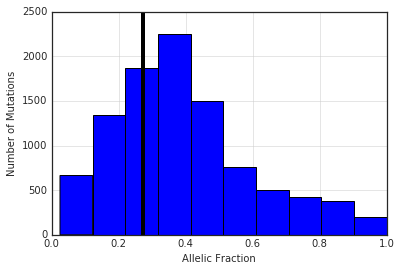

In [15]:
df_all_driver.allelic_fraction.hist()
plt.axvline(df_all_driver.allelic_fraction.quantile(.3), color='k', lw=4)
plt.xlabel('Allelic Fraction')
plt.ylabel('Number of Mutations')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/allelic_fraction.histogram.pdf')

In [16]:
df_all_driver.allelic_fraction.quantile(.25)

0.24657534246599999

In [17]:
df_driver_driver_high_allelic_fraction = df_all_driver[df_all_driver.allelic_fraction \
                                                       > df_all_driver.allelic_fraction.quantile(.3)]
df_driver_driver_high_allelic_fraction.to_csv('/cellar/users/ramarty/Data/hla/mutations/processed_mutation_files.high_allelic_fraction.csv')

In [18]:
df_driver_driver_high_allelic_fraction = df_all_driver[df_all_driver.allelic_fraction \
                                                       < df_all_driver.allelic_fraction.quantile(.3)]
df_driver_driver_high_allelic_fraction.to_csv('/cellar/users/ramarty/Data/hla/mutations/processed_mutation_files.low_allelic_fraction.csv')

Make mutation dataframe on cluster

In [13]:
def create_cluster_script(categories):

    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_gathering/mutations/patient_mutation_matrix.low_allelic_fraction.sh'

    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -t 1-{0}\n".format(len(categories)))
        out_file.write("#$ -l h_vmem=8G\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set categories=({0})\n".format(" ".join(categories)))
        out_file.write("\n")

        out_file.write("set category=$categories[$SGE_TASK_ID]\n")
        out_file.write("\n")

        out_file.write("date\n")
        out_file.write("hostname\n")
        # must update
        out_file.write("python /cellar/users/ramarty/Projects/hla_ii/data_gathering/mutations/patient_mutation_matrix.low_allelic_fraction.py $category\n")
        out_file.write("date\n")

In [14]:
categories = ['cancer']
create_cluster_script(categories)

Clean

In [7]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                index_col=0)
conservative_patients = list(df.index)
print len(conservative_patients)

5942


In [8]:
# high
patient_mutation = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.high_allelic_fraction.TCGA.inclusive.mut.csv',
                               index_col=0)
patient_mutation.loc[conservative_patients].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.high_allelic_fraction.TCGA.conservative.mut.csv')
# low
patient_mutation = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.low_allelic_fraction.TCGA.inclusive.mut.csv',
                               index_col=0)
patient_mutation.loc[conservative_patients].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.low_allelic_fraction.TCGA.conservative.mut.csv')

Verify match of dataframes

In [9]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.inclusive.mut.ClassI.csv',
                                 index_col=0)
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.inclusive.mut.ClassII.csv',
                                 index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/cancer.patient_mutation.high_allelic_fraction.csv',
                                 index_col=0)
print patient_affinitiesI.shape, patient_affinitiesII.shape, patient_mutations.shape

IOError: File /cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/cancer.patient_mutation.high_allelic_fraction.csv does not exist

In [10]:
# for low
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv',
                                 index_col=0)
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv',
                                 index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.low_allelic_fraction.TCGA.conservative.mut.csv',
                                 index_col=0)
print patient_affinitiesI.shape, patient_affinitiesII.shape, patient_mutations.shape

(5942, 1018) (5942, 1018) (5942, 1018)


Run odds ratios

In [19]:
def create_cluster_script(script_label, pans, classes, names, thresholds, tissue_fs, mut_fs, aff_fs):
    
    new_script_file = \
    '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/cluster/OR.{0}.sh'.format(script_label)
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=6G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set classes=({0})\n".format(" ".join(classes)))
        out_file.write("set tissue_fs=({0})\n".format(" ".join(tissue_fs)))
        out_file.write("set mut_fs=({0})\n".format(" ".join(mut_fs)))
        out_file.write("set aff_fs=({0})\n".format(" ".join(aff_fs)))
        out_file.write("set names=({0})\n".format(" ".join(names)))
        out_file.write("set pans=({0})\n".format(" ".join(pans)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set class=$classes[$SGE_TASK_ID]\n")
        out_file.write("set tissue_f=$tissue_fs[$SGE_TASK_ID]\n")
        out_file.write("set mut_f=$mut_fs[$SGE_TASK_ID]\n")
        out_file.write("set aff_f=$aff_fs[$SGE_TASK_ID]\n")
        out_file.write("set name=$names[$SGE_TASK_ID]\n")
        out_file.write("set pan=$pans[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/OR_clean.R " \
                        "$pan $class $name $threshold $tissue_f $mut_f $aff_f\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [20]:
pans = ['1', '1', '0', '0']
classes = ['class_i', 'class_ii']*2
names = ['high_allelic_fraction']*4
thresholds = ['2']*4
tissue_fs = ['patient_tissues.conservative.csv']*4
mut_fs = ['patient_mutations.high_allelic_fraction.TCGA.conservative.mut.csv']*4
aff_fs = ['patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv', 
          'patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv']*2

script_label='high_allelic_fraction'
create_cluster_script(script_label, pans, classes, names, thresholds, tissue_fs, mut_fs, aff_fs)

In [21]:
pans = ['1', '1', '0', '0']
classes = ['class_i', 'class_ii']*2
names = ['low_allelic_fraction']*4
thresholds = ['2']*4
tissue_fs = ['patient_tissues.conservative.csv']*4
mut_fs = ['patient_mutations.low_allelic_fraction.TCGA.conservative.mut.csv']*4
aff_fs = ['patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv', 
          'patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv']*2

script_label='low_allelic_fraction'
create_cluster_script(script_label, pans, classes, names, thresholds, tissue_fs, mut_fs, aff_fs)